In [1]:
import sdevelo as sv
import scvelo as scv
adata = scv.datasets.dentategyrus()

args = sv.Config()
args.cuda_device = -1
args.vis_type_col = 'celltype'
args.vis_key = 'X_tsne'
scv.pp.remove_duplicate_cells(adata)

/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing 

(Working on SDEvelo 0.2.12)
2025-01-14 12:59:32


In [2]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors


/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_3501/233639239.py:2: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
2025-01-14 12:59:39.193228: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736859579

    finished (0:00:11) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [3]:
adata.obs

,clusters,age(days),clusters_enlarged,initial_size_unspliced,initial_size_spliced,initial_size,n_counts
index,,,,,,,
AAACATACCCATGA,Granule immature,35,Granule-immature,434.0,2870.0,2870.0,2460.500000
AAACATACCGTAGT,Radial Glia-like,12,Radial Glia-like,118.0,2367.0,2367.0,2460.499756
AAACATACGAGAGC,Granule mature,35,Granule-mature,140.0,1629.0,1629.0,2460.499756
AAACATACTGAGGG,Granule immature,12,Granule-immature,419.0,4206.0,4206.0,2460.500000
AAACATTGGCATCA,Granule immature,35,Granule-immature,320.0,2887.0,2887.0,2460.500000
...,...,...,...,...,...,...,...
TTTCTACTTCCCGT,Granule immature,35,Granule-immature,266.0,3313.0,3313.0,2460.500000
TTTGACTGCCTGTC,Neuroblast,12,Neuroblast 2,121.0,1584.0,1584.0,2460.499756
TTTGACTGTCTGGA,Granule mature,35,Granule-mature,361.0,2019.0,2019.0,2460.499756


In [4]:
adata.raw = adata.copy()
adata = adata[adata.obs["clusters"].isin(["nIPC", "Neuroblast", "Granule immature", "Granule mature"])].copy()

In [5]:
args = sv.Config()

args.cuda_device = -1

model = sv.SDENN(args, adata)
adata = model.train(100)

cuda
Filtered out 11266 genes that are detected 20 counts (shared).
Extracted 2000 highly variable genes.
Logarithmized X.
Using scVelo version 0.3.3


/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
2291
Epoch: 0, Loss: 1.272, alpha: 0.28, beta: 0.01, gamma: 0.01, s1: 0.010, s2: 0.010,  t_m: 0.630,  u_shift: 0.000,  s_shift: 0.000
Epoch: 50, Loss: 0.452, alpha: 0.51, beta: 5.90, gamma: 4.24, s1: 0.010, s2: 0.010,  t_m: 0.641,  u_shift: 0.000,  s_shift: 0.000


In [6]:
adata = model.train(100)

Epoch: 0, Loss: 0.346, alpha: 0.69, beta: 8.39, gamma: 6.61, s1: 0.010, s2: 0.011,  t_m: 0.733,  u_shift: 0.000,  s_shift: 0.000
Epoch: 50, Loss: 0.325, alpha: 0.73, beta: 11.24, gamma: 8.63, s1: 0.010, s2: 0.010,  t_m: 0.829,  u_shift: 0.000,  s_shift: 0.000


In [7]:
adata = model.train(100)

Epoch: 0, Loss: 0.342, alpha: 0.95, beta: 14.63, gamma: 11.26, s1: 0.010, s2: 0.010,  t_m: 0.891,  u_shift: 0.000,  s_shift: 0.000
Epoch: 50, Loss: 0.317, alpha: 0.92, beta: 14.98, gamma: 11.28, s1: 0.010, s2: 0.010,  t_m: 0.932,  u_shift: 0.000,  s_shift: 0.000


In [8]:
adata.obs

,clusters,age(days),clusters_enlarged,initial_size_unspliced,initial_size_spliced,initial_size,n_counts,latent_time
index,,,,,,,,
AAACATACCCATGA,Granule immature,35,Granule-immature,434.0,2870.0,2870.0,613.913818,0.696970
AAACATACGAGAGC,Granule mature,35,Granule-mature,140.0,1629.0,1629.0,521.464905,0.555556
AAACATACTGAGGG,Granule immature,12,Granule-immature,419.0,4206.0,4206.0,639.512939,0.252525
AAACATTGGCATCA,Granule immature,35,Granule-immature,320.0,2887.0,2887.0,598.843811,0.555556
AAACATTGTTTGTC,Neuroblast,12,Neuroblast 2,915.0,9139.0,9139.0,674.659912,0.171717
...,...,...,...,...,...,...,...,...
TTTCTACTGAACTC,nIPC,12,nIPC,106.0,1813.0,1813.0,483.088776,0.111111
TTTCTACTTCCCGT,Granule immature,35,Granule-immature,266.0,3313.0,3313.0,594.614258,0.353535
TTTGACTGCCTGTC,Neuroblast,12,Neuroblast 2,121.0,1584.0,1584.0,469.395966,0.131313


computing velocity graph (using 6/6 cores)


  0%|          | 0/2291 [00:00<?, ?cells/s]

/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing 

    finished (0:00:07) --> added 
    'sde_velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'sde_velocity_length' (adata.obs)
--> added 'sde_velocity_confidence' (adata.obs)
--> added 'sde_velocity_confidence_transition' (adata.obs)
computing velocity embedding
    finished (0:00:00) --> added
    'sde_velocity_pca', embedded velocity vectors (adata.obsm)


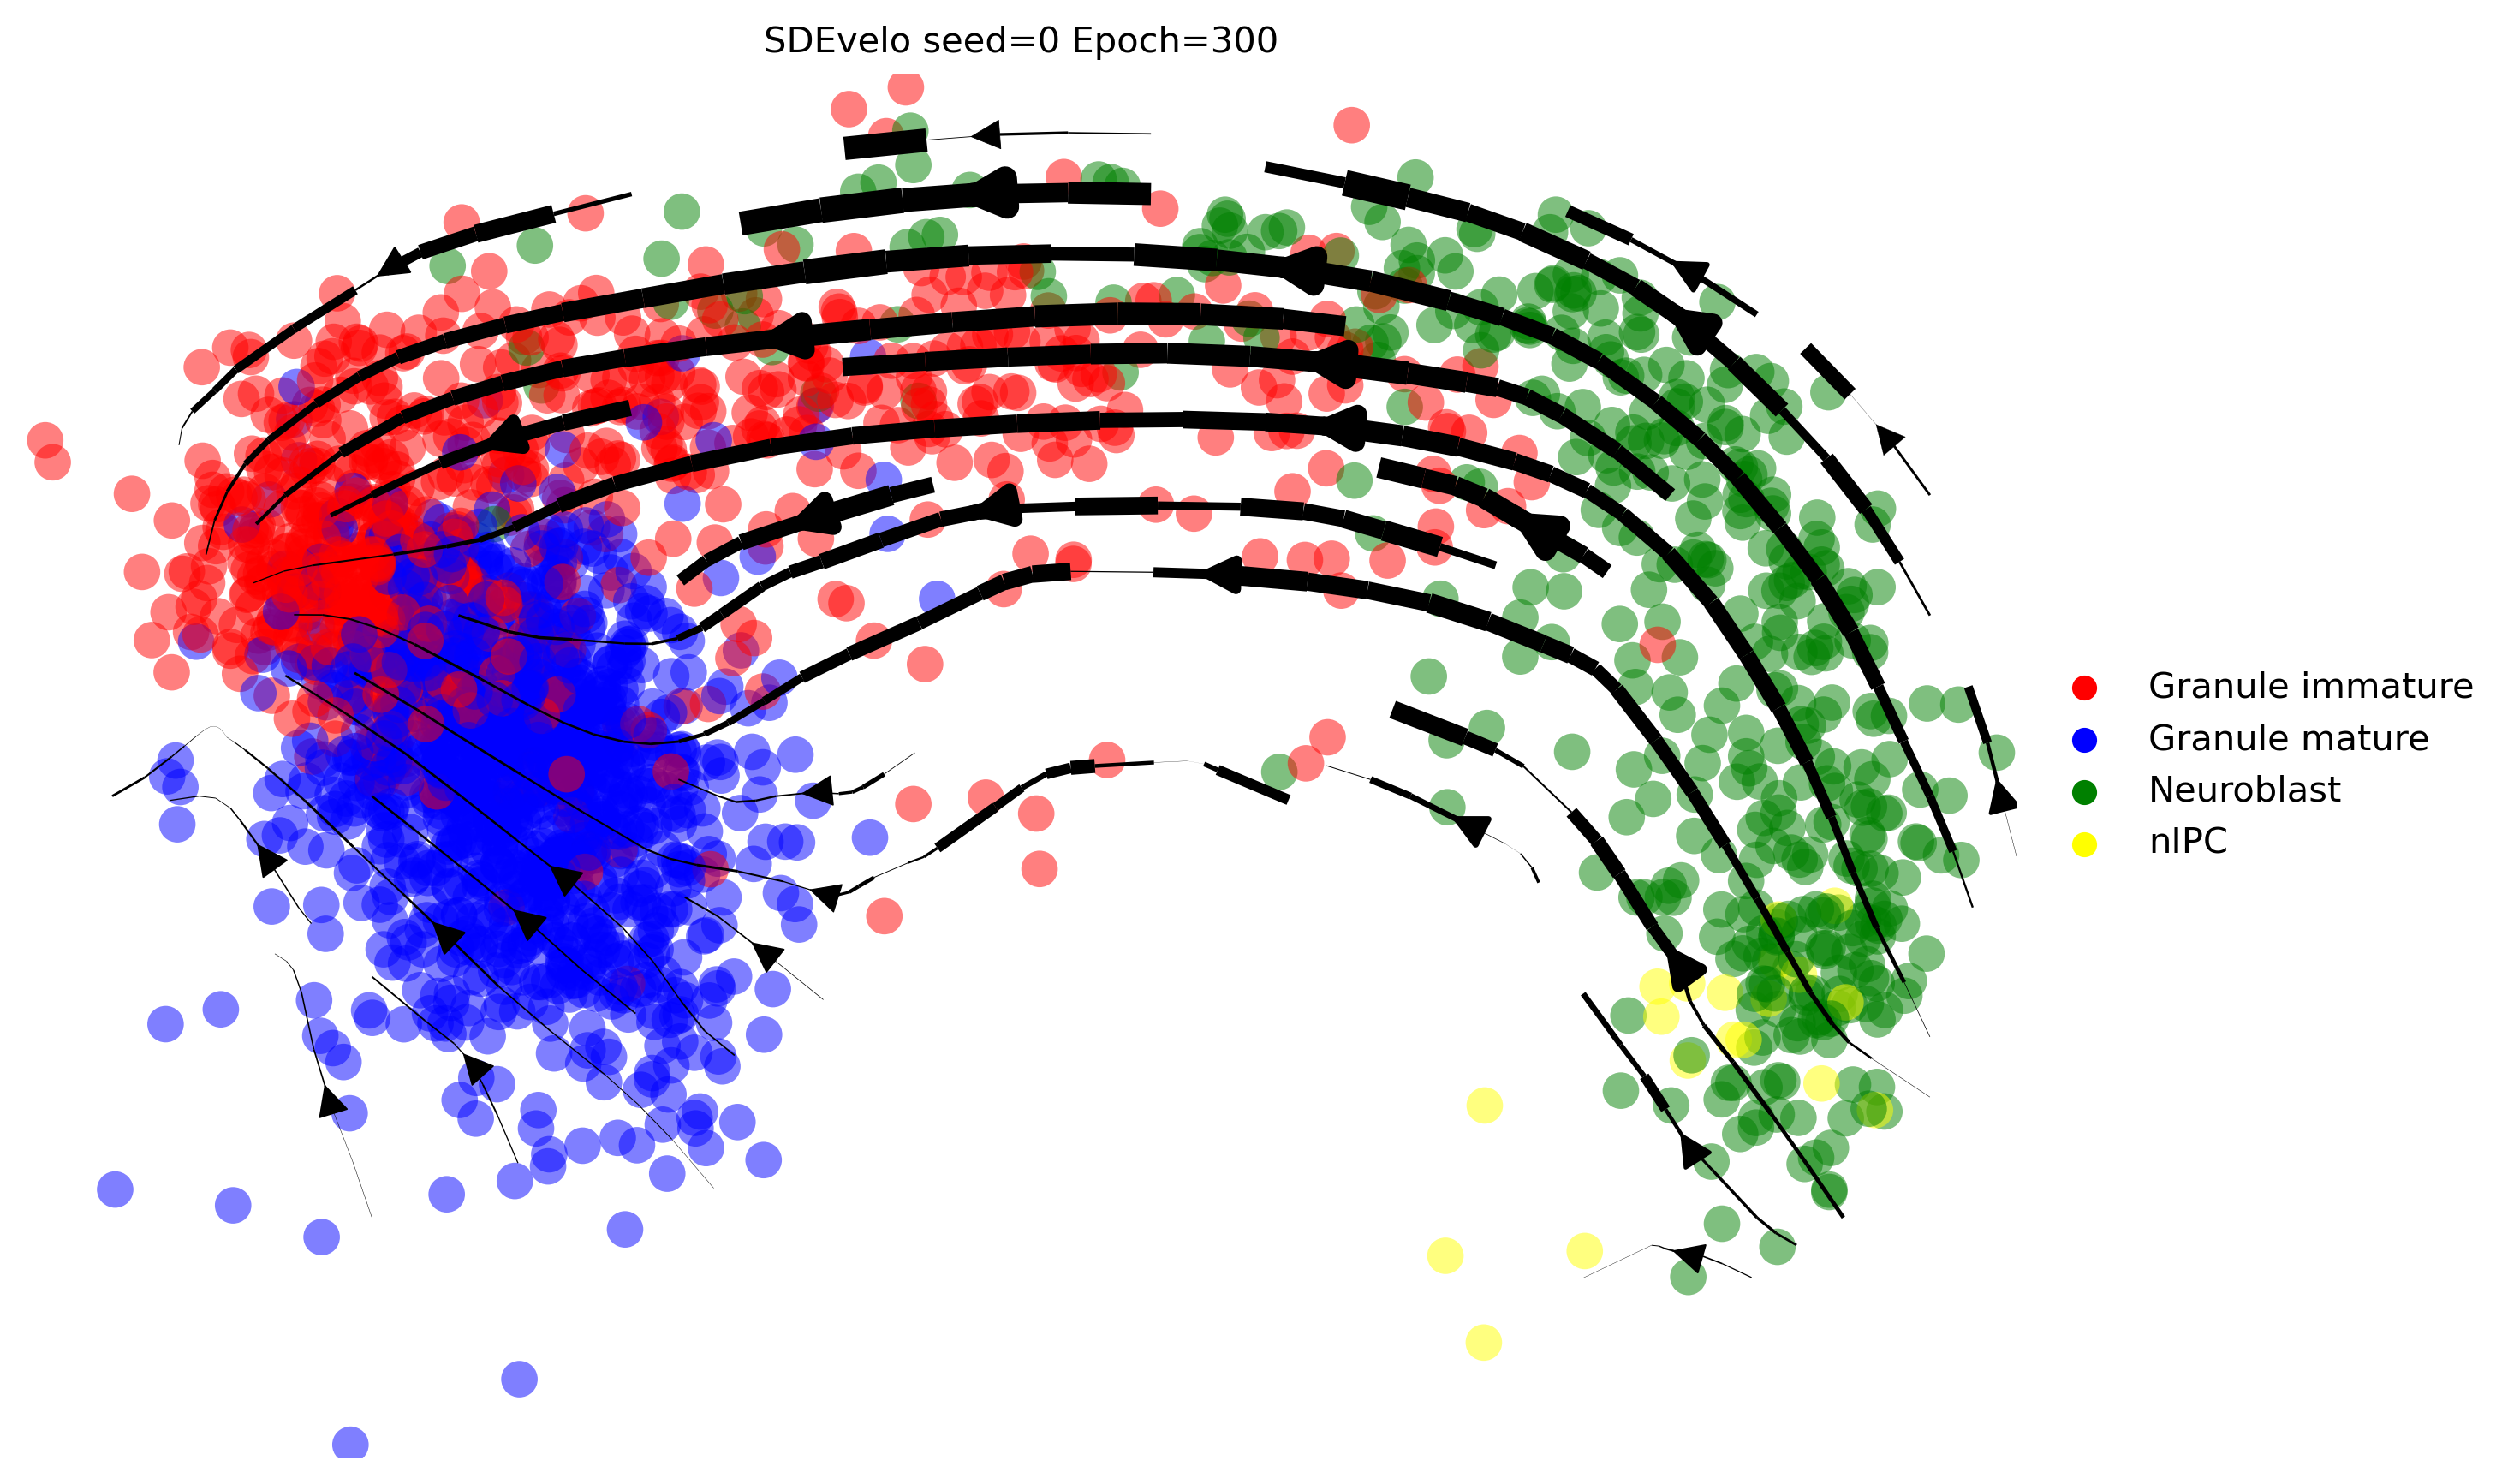

In [9]:
args.vis_type_col = 'clusters'
kwargs = dict(fontsize=10, density=0.8, arrow_size=2, linewidth=4, cmap='plasma', alpha=0.5, palette=["red", "blue", "green", "yellow"])
sv.plot_streamline(adata, args, **kwargs)

In [10]:
adata.write_h5ad("./sdvelo_mouse_neural_full.h5ad")